#### Dataset Detailes
0 hotel (H1 = Resort Hotel or H2 = City Hotel)

1 is_canceled Value indicating if the booking was canceled (1) or not (0)

2 lead_time Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

3 arrival_date_year Year of arrival date

4 arrival_date_month Month of arrival date

5 arrival_date_week_number Week number of year for arrival date

6 arrival_date_day_of_month Day of arrival date

7 stays_in_weekend_nights Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

8 stays_in_week_nights Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

9 adults Number of adults

10 children Number of children

11 babies Number of babies

12 meal Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal

13 country Country of origin. Categories are represented in the ISO 3155–3:2013 format

14 market_segment Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

15 distribution_channel Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16 is_repeated_guest Value indicating if the booking name was from a repeated guest (1) or not (0)

17 previous_cancellations Number of previous bookings that were cancelled by the customer prior to the current booking

18 previous_bookings_not_canceled Number of previous bookings not cancelled by the customer prior to the current booking

19 reserved_room_type Code of room type reserved. Code is presented instead of designation for anonymity reasons.

20 assigned_room_typeCode for the type of room assigned to the booking.Code is presented instead of designation for anonymity reasons.

21 booking_changes Number of changes made to the booking from the moment the booking was entered on the PMS until the moment of check-in or out

22 deposit_type Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No

23 agent ID of the travel agency that made the booking

24 company ID of the company that made the booking or responsible for paying the booking.

25 days_in_waiting_list Number of days the booking was in the waiting list before it was confirmed to the customer

26 customer_type Type of booking, assuming one of four categories:Transient - Transient-Party - Contract - Group

27 adr Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

28 required_car_parking_spaces Number of car parking spaces required by the customer

29 total_of_special_requestsNumber of special requests made by the customer (e.g. twin bed or high floor)

30 reservation_status Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out

31 reservation_status_date Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
hotel_data=pd.read_csv("hotel_bookings.csv")

In [4]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### We see "agent" and "company" are the only columns with null or nan values.

In [6]:
hotel_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### country coulmn values

In [7]:
hotel_data["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NAM        1
CYM        1
BFA        1
MRT        1
GUY        1
Name: country, Length: 177, dtype: int64

#### Since PRT is the largest value in the country column, so we replace the null or nan values with PRT



In [8]:
hotel_data.country.fillna("PRT", inplace=True)

In [9]:
hotel_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### "country" column has the largest amount of null or nan values, so it's better to drop this coulmn

In [10]:
print("The percentage of null values in \"company\" column is: {}%".format(((hotel_data["company"].isna().sum()) / len(hotel_data["company"]))*100))
print("\n\n")
print("The percentage of null values in \"agent\" column is: {}%".format(((hotel_data["agent"].isna().sum()) / len(hotel_data["agent"]))*100))

The percentage of null values in "company" column is: 94.30689337465449%



The percentage of null values in "agent" column is: 13.686238378423655%


#### It's better to drop this column


In [11]:
hotel_data.drop(["company"], axis=1, inplace=True)

In [12]:
hotel_data.columns=="company"

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

### Let's see the short description of the data using describe function to know the insight and tiny details of the data

In [13]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


#### we observe that there are 0 values for children, adults and babies. Let's see if all of them have the 0 value at the same time.

In [14]:
zero_values=(hotel_data["adults"]==0) & (hotel_data["children"]==0) & (hotel_data["babies"]==0)
hotel_data[zero_values]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,1,No Deposit,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,0,No Deposit,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


#### coverting zero_values to a dataframe and then dropping it

In [15]:
zero_df=pd.DataFrame(zero_values)
zero_df.head()

,0
0,False
1,False
2,False
3,False
4,False


#### This isn't the output we are looking for

In [16]:
zero_df=hotel_data[zero_values]
zero_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,1,No Deposit,NaN,0,Transient-Party,0.0,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,No Deposit,38.0,0,Transient-Party,0.0,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.0,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.0,0,0,Check-Out,2016-01-05


In [17]:
hotel_data.drop(zero_df.index, inplace=True)

### What we did here is that we appraoched the indices of zero_values dataframe, i.e., zero_df.index and then we dropped it from our dataframe.



### In my opinion, agent data is of no use despite being only 13% empty. It's of no use in this study

In [18]:
hotel_data.drop(labels=["agent"], axis=1, inplace=True)

In [19]:
hotel_data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Only children column has 4 null or nan values, let's replace them with mean value

In [20]:
hotel_data["children"].fillna(hotel_data["children"].mean(), inplace=True)

In [21]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

## Exploratory Data Analysis (EDA)

In [22]:
hotel_type_count=hotel_data["hotel"].value_counts()

In [23]:
hotel_type_count=pd.DataFrame(hotel_type_count).reset_index()
hotel_type_count

,index,hotel
0,City Hotel,79163
1,Resort Hotel,40047


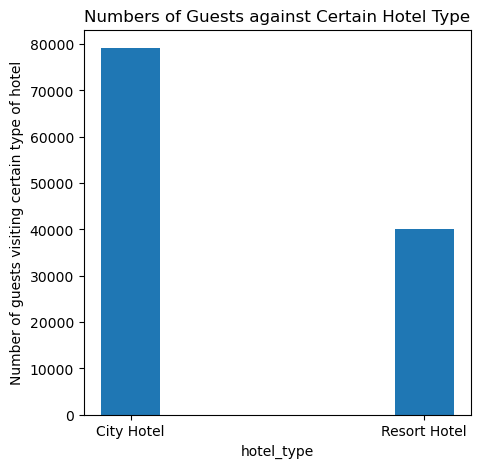

In [24]:
plt.figure(figsize=(5,5))
plt.bar(x=hotel_type_count["index"], height=hotel_type_count["hotel"], width=0.20)
plt.xlabel('hotel_type')
plt.ylabel('Number of guests visiting certain type of hotel')
plt.title('Numbers of Guests against Certain Hotel Type')
plt.show()

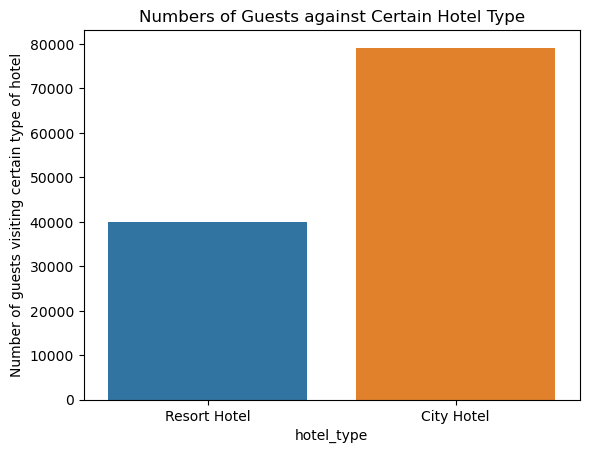

In [25]:
sns.countplot(x=hotel_data["hotel"], data=hotel_data)
plt.xlabel('hotel_type')
plt.ylabel('Number of guests visiting certain type of hotel')
plt.title('Numbers of Guests against Certain Hotel Type')
plt.show()

In [26]:
hotel_canceled=hotel_data[["hotel", "is_canceled"]]

In [27]:
print("The number of canceled value are: ", (hotel_canceled["is_canceled"]==1).sum())
print("The number of non-canceled values are:", (hotel_canceled["is_canceled"]==0).sum())

The number of canceled value are:  44199
The number of non-canceled values are: 75011


In [28]:
hotel_cancel_groupby=hotel_canceled.groupby("hotel")["is_canceled"].value_counts()

In [29]:
hotel_cancel_groupby.head()

hotel         is_canceled
City Hotel    0              46084
              1              33079
Resort Hotel  0              28927
              1              11120
Name: is_canceled, dtype: int64

In [30]:
hotel_cancel_groupby=pd.DataFrame(hotel_cancel_groupby)

In [31]:
hotel_cancel_groupby

is_canceled
hotel        is_canceled             
City Hotel   0                  46084
             1                  33079
Resort Hotel 0                  28927
             1                  11120

In [32]:
hotel_cancel_groupby.columns

Index(['is_canceled'], dtype='object')

<Figure size 300x500 with 0 Axes>

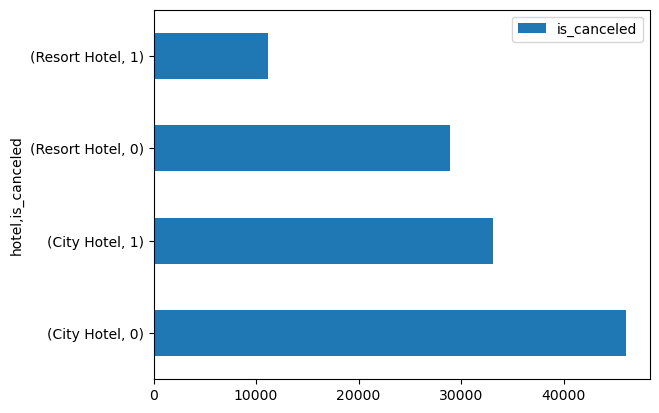

In [33]:
plt.figure(figsize=(3,5))
hotel_cancel_groupby.plot(kind="barh")

plt.show()

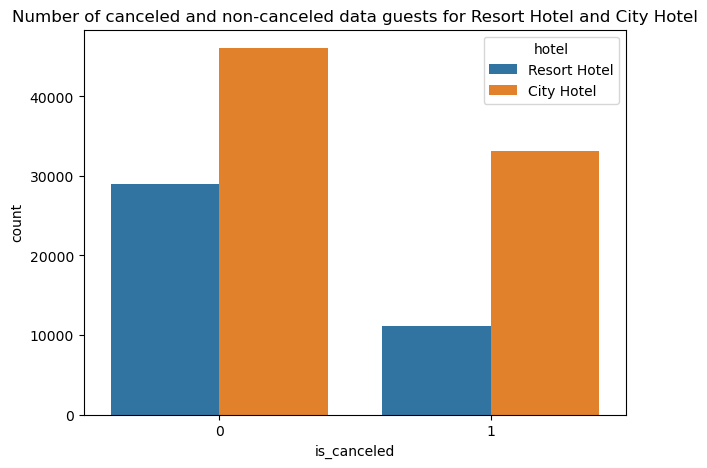

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(x=hotel_data["is_canceled"], data=hotel_data, hue="hotel")
plt.title("Number of canceled and non-canceled data guests for Resort Hotel and City Hotel", fontdict={"fontsize":12})
plt.show()

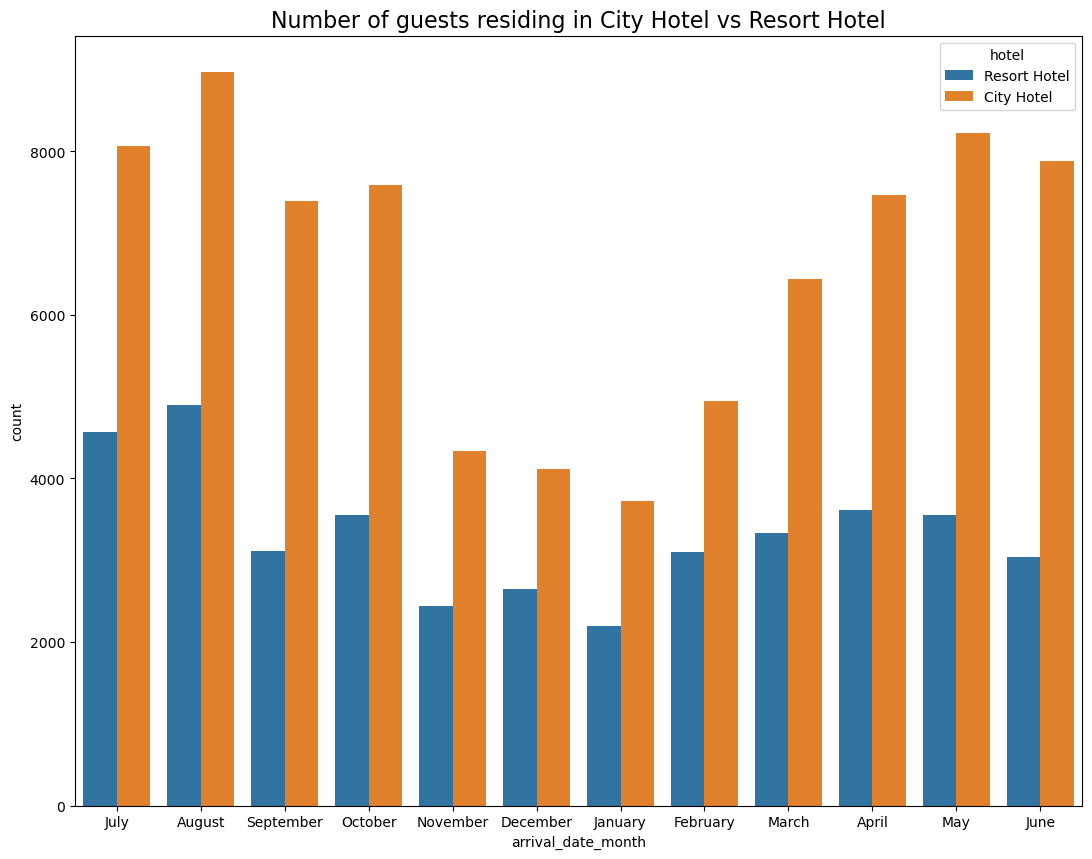

In [35]:
plt.figure(figsize=(13,10))
sns.countplot(x = "arrival_date_month", hue = 'hotel', data = hotel_data)
plt.title("Number of guests residing in City Hotel vs Resort Hotel", fontdict={"fontsize":16})
plt.show()

### This shows, March to October are the seasonal moths with May, June, July and August see the largest number of visitors.



### Plotting the Number of visitors against different countries

In [36]:
total_visitors=hotel_data[(hotel_data['is_canceled'] == 0)]['country'].value_counts().reset_index()
total_visitors.head()

,index,country
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067


In [37]:
total_visitors.columns=["country", "number_of_guests"]

#### more than 100 guests

In [38]:
total_visitors=total_visitors[total_visitors["number_of_guests"]>100]

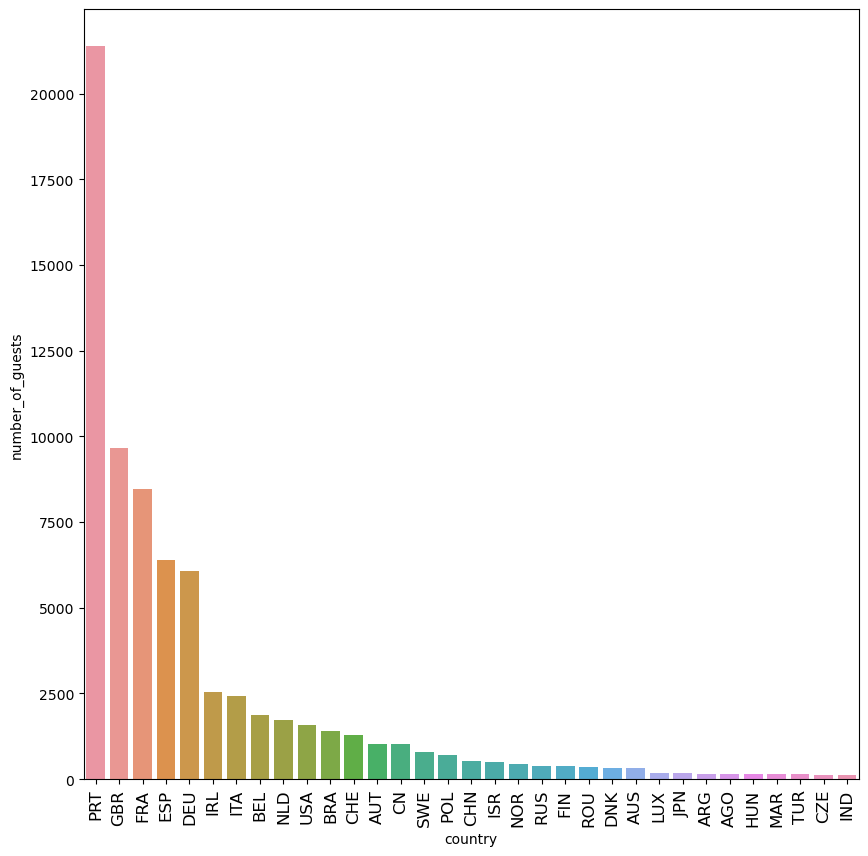

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(data=total_visitors, x="country", y=total_visitors["number_of_guests"])
plt.xticks(rotation=90,fontsize=12)
plt.show()

### prefered children hotel

In [40]:
pref_child_hotel=hotel_data.groupby(["hotel", "babies", "children"])["adults"].value_counts()
pref_child_hotel

hotel         babies  children  adults
City Hotel    0       0.000000  2         53523
                                1         15564
                                3          4638
                                4            31
                      0.104047  2             3
                                          ...  
Resort Hotel  1       1.000000  1             2
                                3             2
                      2.000000  2            11
                                1             1
              2       0.000000  2             9
Name: adults, Length: 61, dtype: int64

In [41]:
pref_child_hotel=pd.DataFrame(pref_child_hotel)
pref_child_hotel

adults
hotel        babies children adults        
City Hotel   0      0.000000 2        53523
                             1        15564
                             3         4638
                             4           31
                    0.104047 2            3
...                                     ...
Resort Hotel 1      1.000000 1            2
                             3            2
                    2.000000 2           11
                             1            1
             2      0.000000 2            9

[61 rows x 1 columns]

In [42]:
keys=pref_child_hotel.keys()
keys

Index(['adults'], dtype='object')

In [43]:
pref_child_hotel["hotel_type"]=pref_child_hotel.index

In [44]:
pref_child_hotel.head(4)

adults               hotel_type
hotel      babies children adults                                 
City Hotel 0      0.0      2        53523  (City Hotel, 0, 0.0, 2)
                           1        15564  (City Hotel, 0, 0.0, 1)
                           3         4638  (City Hotel, 0, 0.0, 3)
                           4           31  (City Hotel, 0, 0.0, 4)

In [45]:
pref_child_hotel.columns

Index(['adults', 'hotel_type'], dtype='object')

In [46]:
pref_child_hotel=pref_child_hotel[pref_child_hotel["adults"]>30]
pref_child_hotel

adults                 hotel_type
hotel        babies children adults                                   
City Hotel   0      0.0      2        53523    (City Hotel, 0, 0.0, 2)
                             1        15564    (City Hotel, 0, 0.0, 1)
                             3         4638    (City Hotel, 0, 0.0, 3)
                             4           31    (City Hotel, 0, 0.0, 4)
                    1.0      2         2663    (City Hotel, 0, 1.0, 2)
                             1          199    (City Hotel, 0, 1.0, 1)
                             3          105    (City Hotel, 0, 1.0, 3)
                    2.0      2         1665    (City Hotel, 0, 2.0, 2)
                             0          205    (City Hotel, 0, 2.0, 0)
                             1          107    (City Hotel, 0, 2.0, 1)
                    3.0      2           46    (City Hotel, 0, 3.0, 2)
             1      0.0      2          283    (City Hotel, 1, 0.0, 2)
                    1.0      2           49    (City Hotel, 1, 1.0, 2)
Resort Hotel 0      0.0      2        28034  (Resort Hotel, 0, 0.0, 2)
                             1         7013  (Resort Hotel, 0, 0.0, 1)
                             3         1027  (Resort Hotel, 0, 0.0, 3)
                    1.0      2         1287  (Resort Hotel, 0, 1.0, 2)
                             3          380  (Resort Hotel, 0, 1.0, 3)
                             1           78  (Resort Hotel, 0, 1.0, 1)
                    2.0      2         1556  (Resort Hotel, 0, 2.0, 2)
                             1           48  (Resort Hotel, 0, 2.0, 1)
             1      0.0      2          425  (Resort Hotel, 1, 0.0, 2)
                    1.0      2           87  (Resort Hotel, 1, 1.0, 2)

In [47]:
#### dropping the data where count value is less than 30

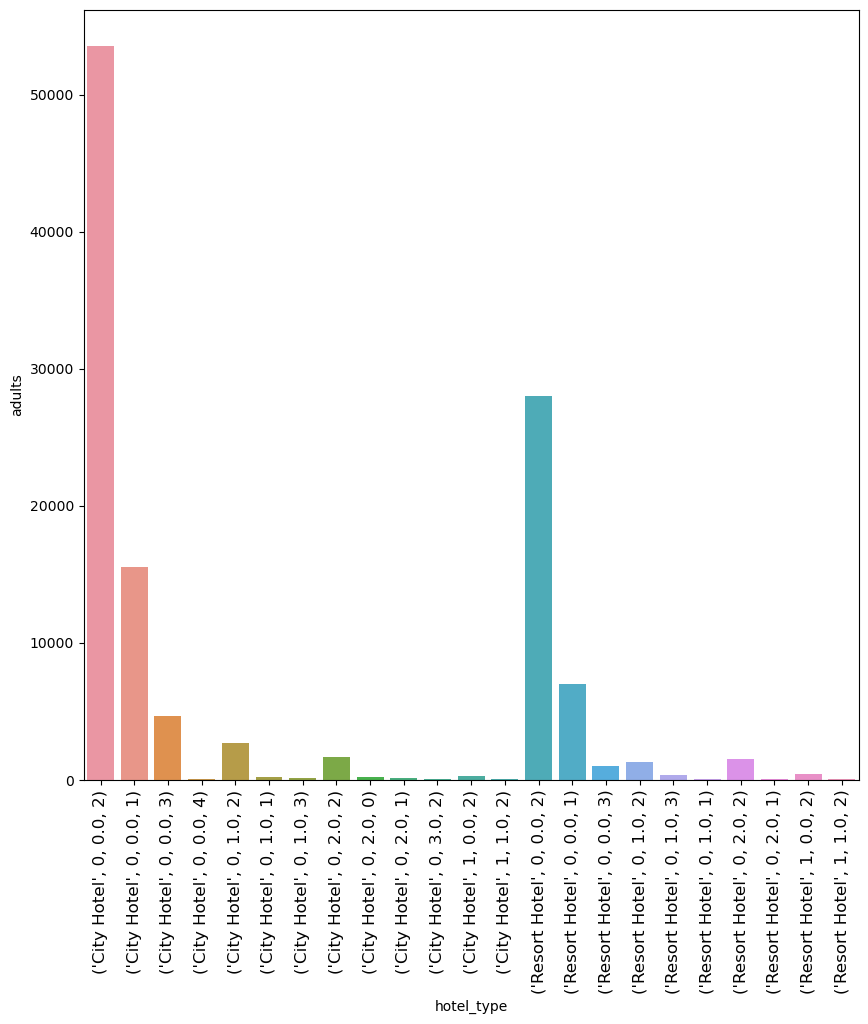

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(data=pref_child_hotel, x="hotel_type", y="adults")
plt.xticks(rotation=90,fontsize=12)
plt.show()

### Let's see the trend of guests on the basis of years

In [49]:
year_base_data=hotel_data.groupby(["arrival_date_year"])["hotel"].value_counts()
year_base_data

arrival_date_year  hotel       
2015               City Hotel      13658
                   Resort Hotel     8309
2016               City Hotel      38059
                   Resort Hotel    18564
2017               City Hotel      27446
                   Resort Hotel    13174
Name: hotel, dtype: int64

In [50]:
year_base_data=pd.DataFrame(year_base_data)
year_base_data

hotel
arrival_date_year hotel              
2015              City Hotel    13658
                  Resort Hotel   8309
2016              City Hotel    38059
                  Resort Hotel  18564
2017              City Hotel    27446
                  Resort Hotel  13174

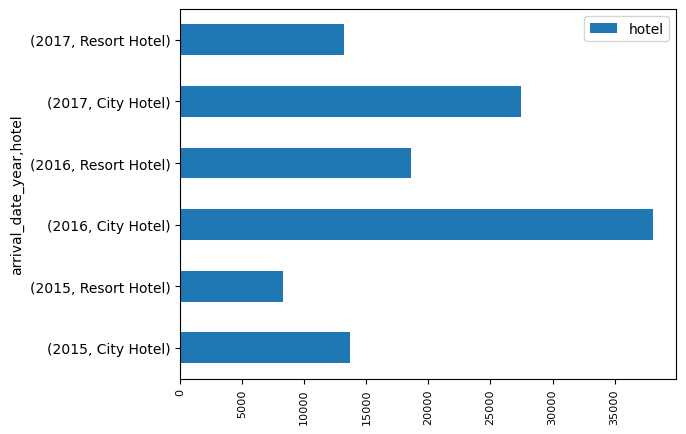

In [51]:
year_base_data.plot(kind="barh")
plt.xticks(rotation="90", fontsize=8)
plt.show()

In [52]:
year_base_data.reset_index(level=0, inplace=True)

In [53]:
year_base_data

,arrival_date_year,hotel
hotel,,
City Hotel,2015,13658
Resort Hotel,2015,8309
City Hotel,2016,38059
Resort Hotel,2016,18564
City Hotel,2017,27446
Resort Hotel,2017,13174


In [54]:
year_base_data.columns

Index(['arrival_date_year', 'hotel'], dtype='object')

In [55]:
year_base_data.index

Index(['City Hotel', 'Resort Hotel', 'City Hotel', 'Resort Hotel',
       'City Hotel', 'Resort Hotel'],
      dtype='object', name='hotel')

In [56]:
year_base_data

,arrival_date_year,hotel
hotel,,
City Hotel,2015,13658
Resort Hotel,2015,8309
City Hotel,2016,38059
Resort Hotel,2016,18564
City Hotel,2017,27446
Resort Hotel,2017,13174


In [57]:
keys=year_base_data.keys()
keys

Index(['arrival_date_year', 'hotel'], dtype='object')

In [58]:
year_base_data["hotel_type"]=year_base_data.index

In [59]:
year_base_data

,arrival_date_year,hotel,hotel_type
hotel,,,
City Hotel,2015,13658,City Hotel
Resort Hotel,2015,8309,Resort Hotel
City Hotel,2016,38059,City Hotel
Resort Hotel,2016,18564,Resort Hotel
City Hotel,2017,27446,City Hotel
Resort Hotel,2017,13174,Resort Hotel


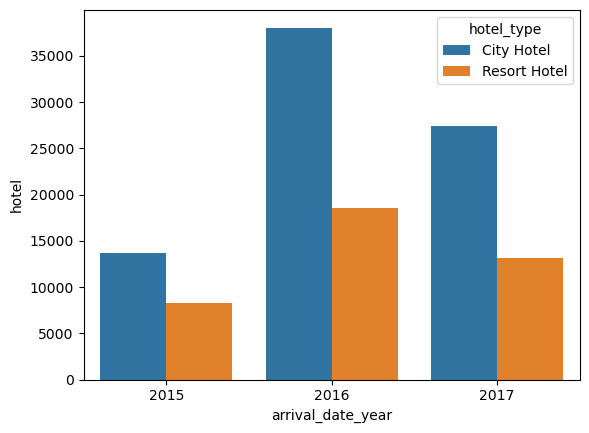

In [60]:
sns.barplot(data=year_base_data, x="arrival_date_year", y="hotel", hue="hotel_type")
plt.show()

### Let's study the most cancellations

In [61]:
cancel_data=hotel_data[["hotel", "is_canceled"]]

In [62]:
cancel_data=cancel_data[cancel_data["is_canceled"]==1]
cancel_data.shape

(44199, 2)

In [63]:
cancel_data.value_counts()

hotel         is_canceled
City Hotel    1              33079
Resort Hotel  1              11120
dtype: int64

In [64]:
cancel_data=pd.DataFrame(cancel_data).reset_index()
cancel_data

,index,hotel,is_canceled
0,8,Resort Hotel,1
1,9,Resort Hotel,1
2,10,Resort Hotel,1
3,27,Resort Hotel,1
4,32,Resort Hotel,1
...,...,...,...
44194,108829,City Hotel,1
44195,111355,City Hotel,1
44196,111924,City Hotel,1
44197,111925,City Hotel,1


In [65]:
cancel_data=cancel_data.drop(["index"], axis=1)

In [66]:
cancel_data.head()

,hotel,is_canceled
0,Resort Hotel,1
1,Resort Hotel,1
2,Resort Hotel,1
3,Resort Hotel,1
4,Resort Hotel,1


### Plotting

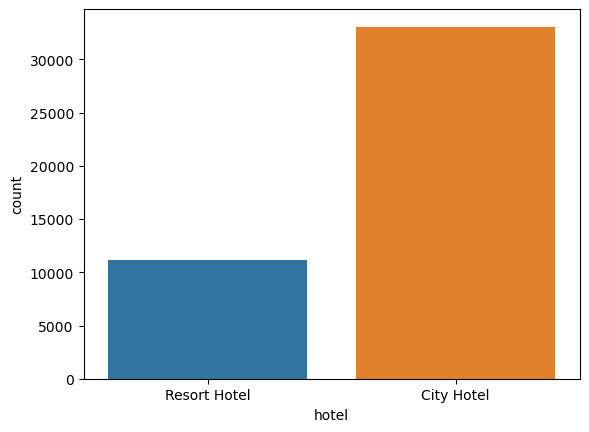

In [67]:
sns.countplot(data=cancel_data, x="hotel")
plt.show()

### How many guests are there who repeatedly booked the same hotel

In [68]:
(hotel_data["is_repeated_guest"]==1).sum()

3755

In [69]:
repeated_data=hotel_data[hotel_data["is_repeated_guest"]==1]
repeated_data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13937,Resort Hotel,0,6,2016,April,17,20,0,2,1,...,E,0,No Deposit,0,Transient,0.00,1,0,Check-Out,2016-04-22
14681,Resort Hotel,1,202,2015,July,30,22,2,5,2,...,A,0,No Deposit,0,Contract,90.95,0,0,Canceled,2015-01-01


In [70]:
repeated_data=repeated_data[["hotel", "is_repeated_guest", "meal", "assigned_room_type"]]

In [71]:
repeated_value=repeated_data.value_counts()

In [72]:
repeated_value=pd.DataFrame(repeated_value)
repeated_value.head(4)

0
hotel        is_repeated_guest meal assigned_room_type      
City Hotel   1                 BB   A                   1338
Resort Hotel 1                 BB   A                    627
                                    D                    580
City Hotel   1                 BB   D                    279

In [73]:
repeated_value.shape

(52, 1)

In [74]:
repeated_value=repeated_value.reset_index().rename(columns={"hotel":"hotel_type", 0:"count"})
repeated_value

,hotel_type,is_repeated_guest,meal,assigned_room_type,count
0,City Hotel,1,BB,A,1338
1,Resort Hotel,1,BB,A,627
2,Resort Hotel,1,BB,D,580
3,City Hotel,1,BB,D,279
4,Resort Hotel,1,BB,E,151
5,Resort Hotel,1,BB,C,70
6,City Hotel,1,BB,E,69
7,City Hotel,1,SC,A,61
8,Resort Hotel,1,BB,F,54
9,City Hotel,1,BB,F,52


### Plotting

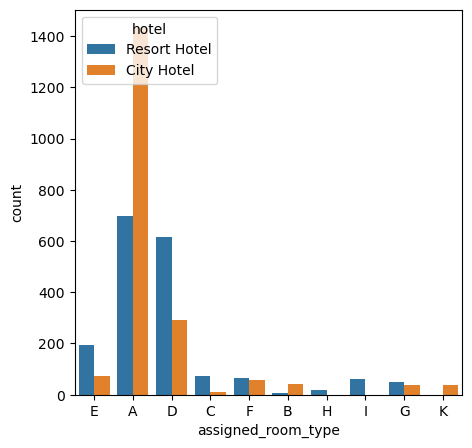

In [75]:
plt.figure(figsize=(5,5))
sns.countplot(x="assigned_room_type", hue="hotel", data=repeated_data)
plt.show()

### Simple data with assigned_room_type on x-axis

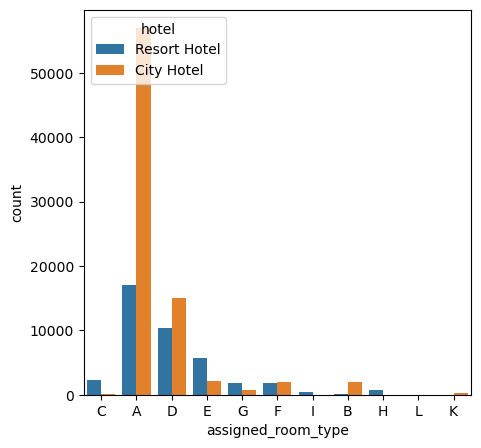

In [76]:
plt.figure(figsize=(5,5))
sns.countplot(x = "assigned_room_type", hue = 'hotel', data = hotel_data)
plt.show()

#### We'll draw both above graphs side by side for comparison

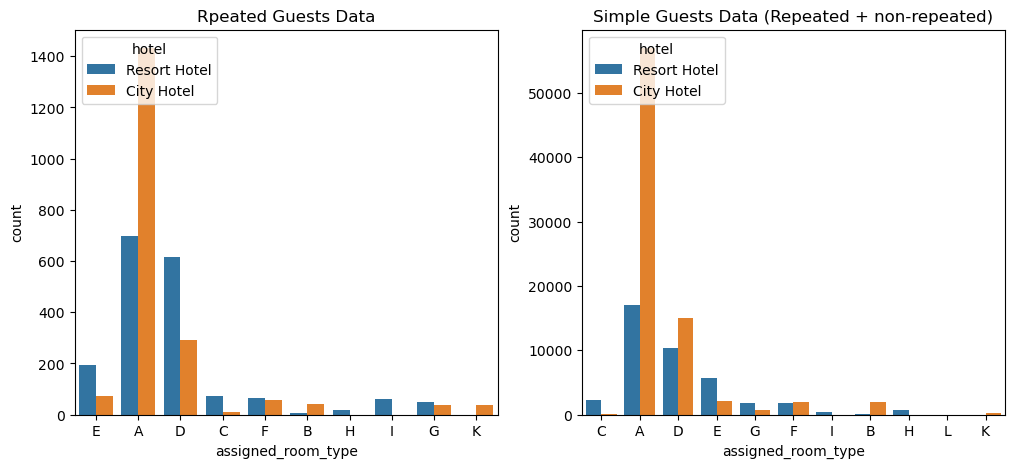

In [77]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

sns.countplot(x="assigned_room_type", hue="hotel", data=repeated_data)
plt.title("Rpeated Guests Data", fontdict={"fontsize":"12"})

plt.subplot(1,2,2)

sns.countplot(x = "assigned_room_type", hue = 'hotel', data = hotel_data)
plt.title("Simple Guests Data (Repeated + non-repeated)", fontdict={"fontsize":"12"})

plt.show()

#### From simple guests data, assigned_room_type A, D are the most booked rooms for both the types of hotels.
#### It follows from simple data that assigned_room_type A and D are the most booked rooms by repeated guests. The difference between the number of booked rooms A and D for both City Hotel and Resort Hotel also follows from simple data.

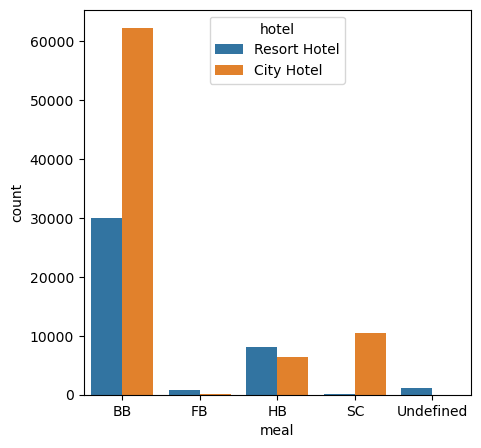

In [78]:
plt.figure(figsize=(5,5))
sns.countplot(x = "meal", hue = 'hotel', data = hotel_data)
plt.show()

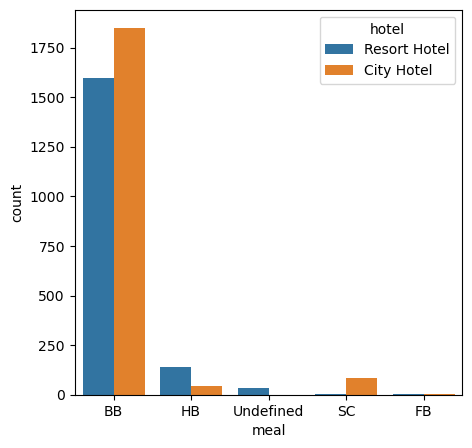

In [79]:
plt.figure(figsize=(5,5))
sns.countplot(x="meal", hue="hotel", data=repeated_data)
plt.show()

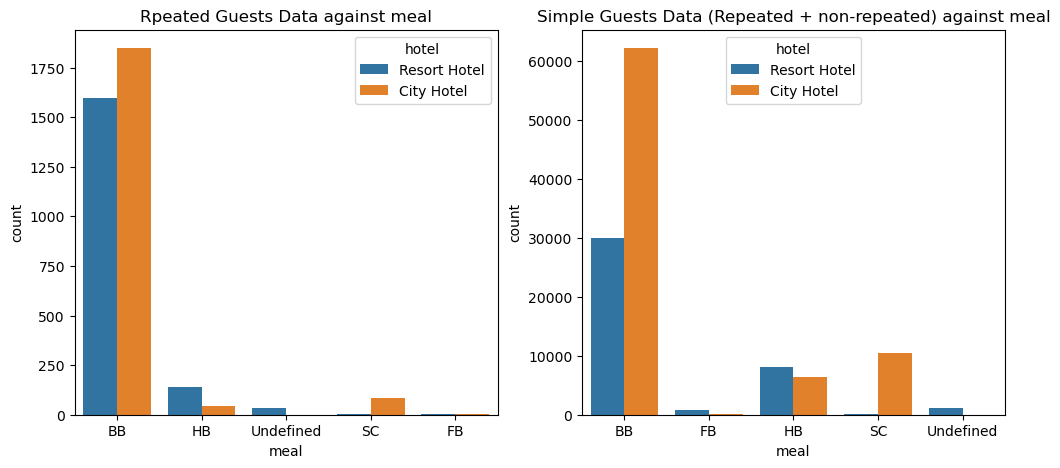

In [81]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

sns.countplot(x="meal", hue="hotel", data=repeated_data)
plt.title("Rpeated Guests Data against meal", fontdict={"fontsize":"12"})

plt.subplot(1,2,2)

sns.countplot(x = "meal", hue = 'hotel', data = hotel_data)
plt.title("Simple Guests Data (Repeated + non-repeated) against meal", fontdict={"fontsize":"12"})

plt.show()

#### Most repeated guests booked the BB type meal